# Predicting Medical Insurance Costs in the U.S.

### Objective
This project explores the **US Medical Insurance Costs** dataset to understand the factors that influence individual healthcare charges. The goal is to uncover patterns, visualize relationships, and build predictive models that estimate insurance costs based on personal attributes.

### Dataset Overview
The dataset contains demographic and health-related information for individuals, including:
- `age`: Age of the individual
- `sex`: Gender (male/female)
- `bmi`: Body Mass Index
- `children`: Number of dependent children
- `smoker`: Smoking status (yes/no)
- `region`: Residential region in the U.S.
- `charges`: Medical insurance cost billed to the individual

### Expected Outcomes
- Identify key drivers of insurance charges
- Quantify the impact of smoking, number of children, gender, and age on cost
- Present insights through visualizations and summary statistics


---
## Library Imports

Before diving into data analysis and visualization, we import the essential Python libraries:
- `csv`: A built-in module for reading and parsing CSV files manually. Useful for lightweight data loading and custom parsing logic.
- `matplotlib.pyplot`: A core plotting library for creating static, animated, and interactive visualizations. We'll use it for basic charts like scatter plots and line graphs.
- `seaborn`: A powerful statistical data visualization library built on top of Matplotlib. It provides high-level functions for creating attractive and informative plots such as box plots, violin plots, and heatmaps.


In [43]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
print(sns.__version__)
print(csv.__version__)
import matplotlib
print(matplotlib.__version__)

0.13.2
1.0
3.9.2


In [51]:
# Initializes an empty dictionary to store the dataset.
data_dict = {}

# Opens the CSV file in read mode.
with open('insurance.csv') as insurance_file:
    # Reads each row of the CSV as a dictionary, where column headers become keys.
    insurance_csv = csv.DictReader(insurance_file)

    for row in insurance_csv:
        for key, value in row.items():
            # Ensures each key in `data_dict` has a list as its value.
            # Adds each value from the CSV row to the corresponding list in `data_dict`.
            data_dict.setdefault(key, []).append(value)

# After execution, `data_dict` will contain:
# - Keys corresponding to column names (`age`, `sex`, `bmi`, `children`, `smoker`, `region`, `charges`)
# - Values as lists of entries for each column
# This structure allows easy access to column-wise data and supports custom parsing, filtering, and transformation for further analysis.
  
# print(data_dict)

---
## Data Cleaning and Type Conversion

Before performing any analysis or modeling, it's essential to ensure that the data is in the correct format. This block performs key preprocessing steps:

This step ensures that the dataset is numerically consistent and stripped of irrelevant features, making it ready for visualization and modeling.


In [53]:
# Converts all age values from strings to integers.
data_dict['age'] = [int(x) for x in data_dict['age']]

#Converts the number of children from strings to integers.
data_dict['children'] = [int(x) for x in data_dict['children']]

# Converts medical charges from strings to floating-point numbers.
data_dict['charges'] = [float(x) for x in data_dict['charges']]

# Rounds each charge to two decimal places for cleaner presentation and consistency.
data_dict['charges'] = [round(float(x), 2) for x in data_dict['charges']]

# These columns are removed from the dictionary, as they are not needed for the current analysis as BMI is not 
# generally a sign of good health unless the person is obese and region does seem to matter here as well.
del data_dict['bmi']
del data_dict['region']

In [54]:
# print(data_dict)

---
## Analyzing Insurance Charges by Smoking Status

This section investigates how smoking affects medical insurance charges. We calculate the average charges for smokers and non-smokers, and visualize the distribution using a box plot.


Average charges for smokers: 32050.23
Average charges for non-smokers: 8434.27


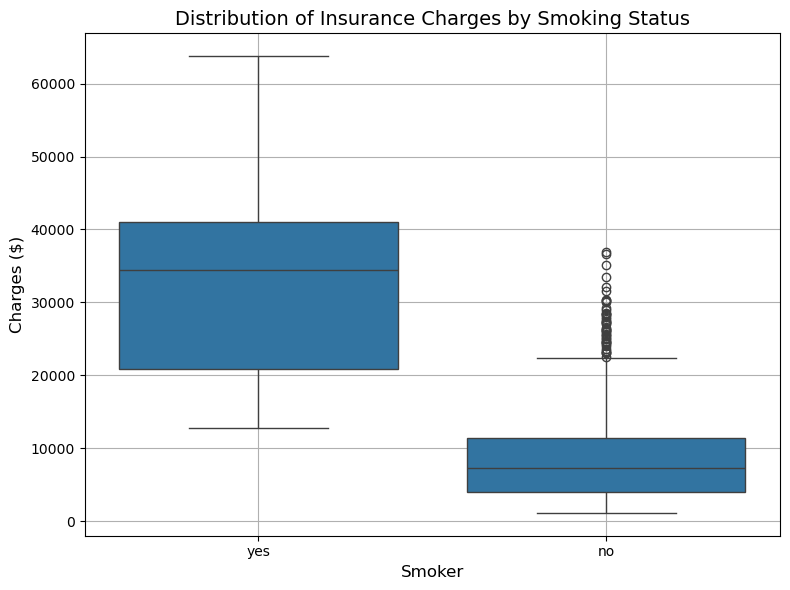

In [56]:
# Step 1: Aggregate Charges by Smoking Status
# Two variables are initialized to store the total charges for smokers and non-smokers:
smoker_yes_charges = 0
smoker_no_charges = 0

# Then, we iterate through the dataset using zip() to pair each individual's smoking status with their corresponding charge
for smoker_status, charge in zip(data_dict["smoker"], data_dict["charges"]):
    if smoker_status == 'yes':
        smoker_yes_charges += charge
    else:
        smoker_no_charges += charge

# Step 2: Calculate Average Charges
# We compute the average charges for each group by dividing the total charges by the number of individuals in each category. 
# The results are rounded to two decimal places for clarity:

average_charges_smokers = round(smoker_yes_charges / data_dict["smoker"].count('yes'), 2)
average_charges_non_smokers = round(smoker_no_charges / data_dict["smoker"].count('no'), 2)

# These averages provide a quick comparison of how smoking status impacts insurance costs.
print(f"Average charges for smokers: {average_charges_smokers}")
print(f"Average charges for non-smokers: {average_charges_non_smokers}")

# Step 3: Visualize with a Box Plot
# To better understand the distribution of charges, we use a box plot:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_dict, x='smoker', y='charges')

# The box plot shows the median, interquartile range, and outliers for each group.
# It helps reveal whether smokers tend to have higher variability or extreme charges compared to non-smokers.
# We enhance the plot with labels and formatting:
plt.title('Distribution of Insurance Charges by Smoking Status', fontsize=14)
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


This analysis highlights the financial impact of smoking on insurance costs. Box plot shows a higher median and wider spread for smokers, it supports the hypothesis that smoking significantly increases medical expenses.

---
## Visualizing Insurance Charges vs Age

This scatter plot helps us explore the relationship between an individual's age and their medical insurance charges.

### What the Plot Shows:
- Each point represents one individual from the dataset.
- The x-axis (`age`) shows the person's age.
- The y-axis (`charges`) shows the total medical cost billed to insurance.
- Point size (`s=100`) is increased for better visibility.

### Why This Matters:
- We can visually assess whether insurance charges tend to increase with age.
- Patterns such as clustering, outliers, or trends may suggest age-related risk factors.

This visualization is a key step in understanding how age influences healthcare costs and whether it should be a primary feature in predictive modeling.

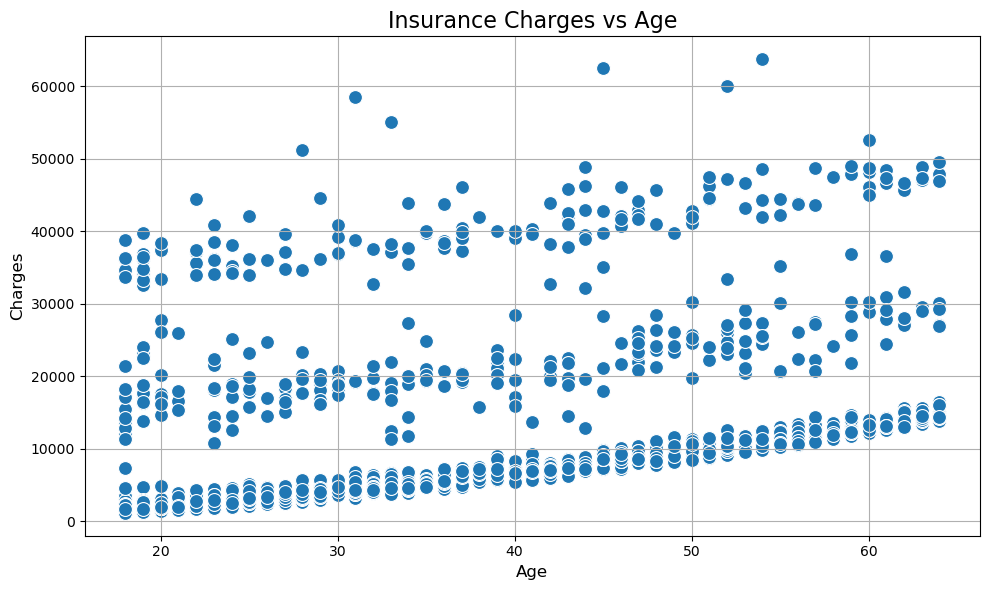

In [60]:
# Enlarges the plot for better readability.
plt.figure(figsize=(10, 6))

# Creates the scatter plot using Seaborn for cleaner styling.
sns.scatterplot(data=data_dict, x='age', y='charges', s=100)

# Adds informative labels and titles.
plt.title('Insurance Charges vs Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Adds gridlines to improve visual alignment.
plt.grid(True)

# Ensures elements don’t overlap.
plt.tight_layout()
plt.show()

---
## Analyzing Insurance Charges by Gender

This section explores how medical insurance charges differ between male and female individuals in the dataset. We calculate average charges for each gender and visualize the distribution using a box plot.

Average charges for males: 12990.77
Average charges for females: 13555.98


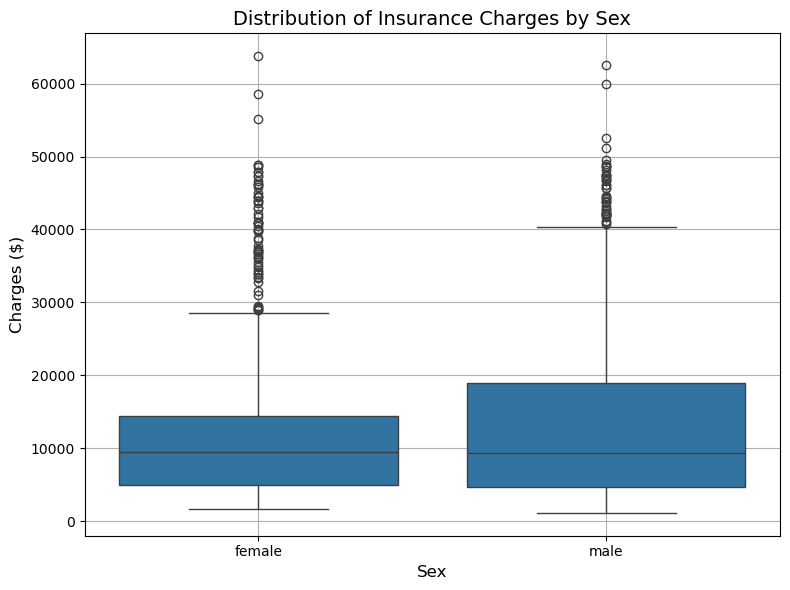

In [64]:
# Step 1: Aggregate Charges by Gender
# We initialize two variables to store the total charges for males and females
male_charges = 0
female_charges = 0

# Using zip(), we iterate through each individual's gender and corresponding charge
for gender_status, charge in zip(data_dict["sex"], data_dict["charges"]):
    if gender_status == 'male':
        male_charges += charge
    else:
        female_charges += charge

# Step 2: Calculate Average Charges
# We compute the average charges for each gender by dividing the total charges by the number of individuals in each group. 
# The results are rounded to two decimal places

average_charges_males = round(smoker_yes_charges / data_dict["sex"].count('male'), 2)
average_charges_female = round(smoker_no_charges / data_dict["sex"].count('female'), 2)

print(f"Average charges for males: {average_charges_males}")
print(f"Average charges for females: {average_charges_female}")

# Step 3: Visualize with a Box Plot
# We use a box plot to compare the distribution of charges between males and females
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_dict, x='sex', y='charges')

# The box plot shows the median, interquartile range, and outliers for each gender.
# It helps reveal whether one gender tends to incur higher or more variable medical costs.
# We enhance the plot with labels and formatting
plt.title('Distribution of Insurance Charges by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis: Age has no significant affect on issurance charges billed.

---
## Insurance Charges vs Number of Dependents

This scatter plot explores the relationship between the number of dependent children (`children`) and the medical insurance charges (`charges`) for each individual in the dataset.

### What the Plot Shows:
- Each point represents one individual.
- The x-axis (`children`) indicates how many dependent children the person has.
- The y-axis (`charges`) shows the total medical cost billed to insurance.
- Point size (`s=100`) is increased for better visibility.

### Why This Matters:
- This visualization helps us assess whether having more dependents correlates with higher insurance costs.
- It may reveal patterns such as:
  - Clusters of individuals with similar charges
  - Outliers with unusually high costs
  - Whether charges increase consistently with more children

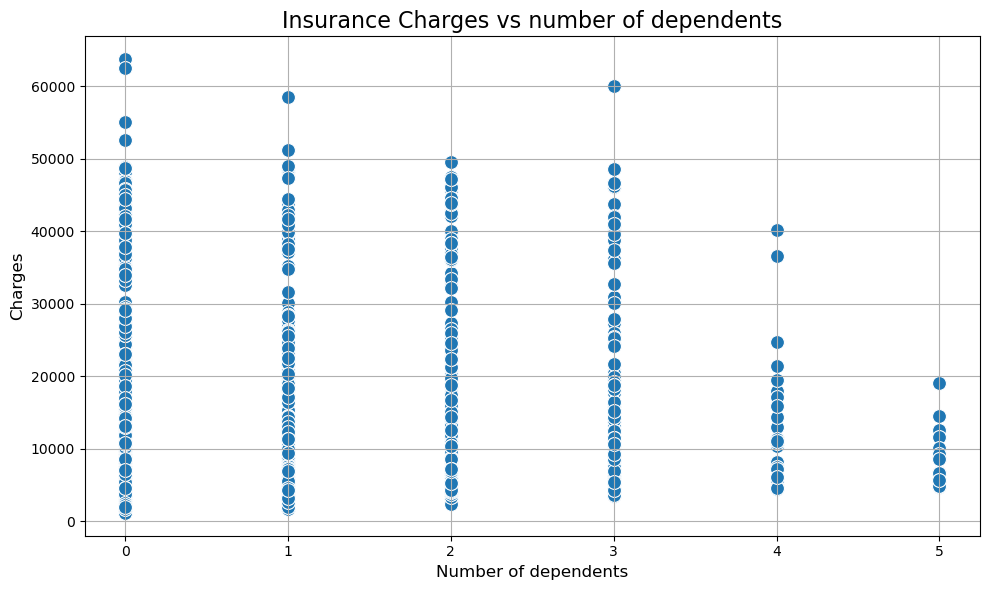

In [66]:
# Enlarges the plot for better readability.
plt.figure(figsize=(10, 6))

# Uses Seaborn for cleaner styling and easier integration with dictionary-based data.
sns.scatterplot(data=data_dict, x='children', y='charges', s=100)

# Adds informative labels and titles.
plt.title('Insurance Charges vs number of dependents', fontsize=16)
plt.xlabel('Number of dependents', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Adds gridlines for easier visual alignment.
plt.grid(True)

# Prevents overlap between plot elements.
plt.tight_layout()
plt.show()

Insight:
Plot shows no clear upward trend and suggests that the number of dependents has no influence on insurance charges.

---
## Conclusion
Only age and whether the issured individual is a smoker or not influences insurance charges billes.

---